# Capstone Project 2: Canada EV Chargers Analysis

# 1.0 Introduction

## 1.1 Problem Statement
What opportunity exist for EV Station to enter Canadian EV Charging Market, especially for Ontario, through installing new Public EV Chargers, as the emerging trend of using Electrical Vehicles.

## 1.2 Context
EV Station is a start-up company providing multi-type EV Chargers for all types of EVs on the market. The company has successfully installed over 10K EV Chargers over 10 states in the United States, and are looking to enter the Canadian EV charging market. EV Station data science team was consulted by the management team for estimating the Canadian market size. The management would like to investigate the estimated number of additional EV chargers needed currently in Canada, revenue for the company if they fill the gap, and how it will be needed in the next few years. 

## 1.3 Criteria for Success
The addition of EV chargers in Ontario will be estimated for the management team to study the feasibility of entering the Canadian Market.

## 1.4 Scope of Solution Space
Ontario/Toronto will be the target area of estimating the number of EV Chargers. Both American and Canadian data will be used, as they share a similar lifestyle and market.

## 1.5 Constraints
The number of home-installed EV charger or private-shared EV charger data could not be collected. So we will focus on the public paid/unpaid charger



# 2.0 Data Wrangling

As the second step of the project, data collection, define data, and dataset cleaning are completed. The data will be kept updated if necessary.

In [1]:
##import any necessary packages here:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

### 2.1 Canadian and United States Alternative Fuel Charging Station Database:
https://www.nrcan.gc.ca/energy-efficiency/transportation-alternative-fuels/electric-charging-alternative-fuelling-stationslocator-map/20487#/find/nearest

This database will provide 53292 charging stations in the United States and Canada. The basic information of the charging stations include location of each charging station, type of chargers, coordinates, number of chargers, charger speed, etc.

As the first step, this dataset will be loaded to this notebook.

In [2]:
# the supplied CSV data file is the raw_data directory
charger_data = pd.read_csv('../raw_data/alt_fuel_stations (Mar 28 2022).csv')

/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,39,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#first glance of the dataset
charger_data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,NaN,626-575-6800,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,800-256-6219,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,NaN,951-351-3110,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Call the info method on charger_data to see a summary of the data
charger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53291 entries, 0 to 53290
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    53291 non-null  object 
 1   Station Name                      53291 non-null  object 
 2   Street Address                    53290 non-null  object 
 3   Intersection Directions           2148 non-null   object 
 4   City                              53291 non-null  object 
 5   State                             53291 non-null  object 
 6   ZIP                               53290 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     52666 non-null  object 
 9   Status Code                       53291 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           53291 non-null  object 
 12  Acce

As we can see, multiple columns are empty columns. These columns might be for other alternative fuel stations and do not have any relationships with the EV chargers. So we should drop all of them for further processes.

In [5]:
# Find the columns where each value is null
empty_cols = [col for col in charger_data.columns if charger_data[col].isnull().all()]
# Drop these columns from the dataframe
charger_data.drop(empty_cols,axis=1,inplace=True)

#We may drop other duplicate columns and useless columns, such as the ones in French, and federal agency name/codes
#'Intersection Directions (French)','Access Days Time (French)','Groups With Access Code (French)','EV Pricing (French)', 'Federal Agency ID','Federal Agency Name','Federal Agency Code']
charger_data.drop(['Cards Accepted','Intersection Directions (French)','Access Days Time (French)','Groups With Access Code (French)','EV Pricing (French)', 'Federal Agency ID','Federal Agency Name','Federal Agency Code'],axis=1,inplace=True)

In [6]:
#Explore one of the columns
charger_data.iloc[:1].transpose()

,0
Fuel Type Code,ELEC
Station Name,Los Angeles Convention Center
Street Address,1201 S Figueroa St
Intersection Directions,West hall and South hall
City,Los Angeles
State,CA
ZIP,90015
Station Phone,213-741-1151
Status Code,E
Groups With Access Code,Public


### 2.1.1 Data Cleaning

Within the current features, we may care about some important ones, including location (states/city), number of EV chargers, EV charger types (Level 1, 2, or DC Fast), EV Connector Types, Country. All other features are less important the others. We may also visualize the installation dates, as EV chargers may have its service life, or they should be updated after a few years becasue of the technology advancement.

As the next step, we will clean the important features. For example, fill the NaN data can help to calculate in the further steps.

#### Number of Different Charging Ports

In [7]:
#Fill the number of three types of EV charger NaN to 0
charger_data['EV Level1 EVSE Num']=charger_data['EV Level1 EVSE Num'].fillna(0)
charger_data['EV Level2 EVSE Num']=charger_data['EV Level2 EVSE Num'].fillna(0)
charger_data['EV DC Fast Count']=charger_data['EV DC Fast Count'].fillna(0)

In [8]:
charger_data['Total Ports'] = charger_data['EV Level1 EVSE Num'] + charger_data['EV Level2 EVSE Num']+charger_data['EV DC Fast Count']

In [9]:
#Melt the charging ports data
charger_type = pd.melt(charger_data[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count','State','Country']], 
                        id_vars=['Country','State'], 
                        var_name='Charger Type', 
                        value_vars=['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], 
                        value_name='Number of Charger')

In [10]:
charger_type= charger_type[charger_type['Number of Charger'] != 0]
charger_type.head()

,Country,State,Charger Type,Number of Charger
22,US,CA,EV Level1 EVSE Num,1.0
39,US,CA,EV Level1 EVSE Num,12.0
47,US,CA,EV Level1 EVSE Num,4.0
54,US,CA,EV Level1 EVSE Num,1.0
57,US,CA,EV Level1 EVSE Num,1.0


In [11]:
charger_count=charger_type.groupby(['Country','State'])['Charger Type'].value_counts()
charger_count=charger_count.to_frame(name='Counts').reset_index()

,Country,State,Charger Type,Counts
0,CA,AB,EV Level2 EVSE Num,222
1,CA,AB,EV DC Fast Count,68
2,CA,AB,EV Level1 EVSE Num,1
3,CA,BC,EV Level2 EVSE Num,970
4,CA,BC,EV DC Fast Count,236


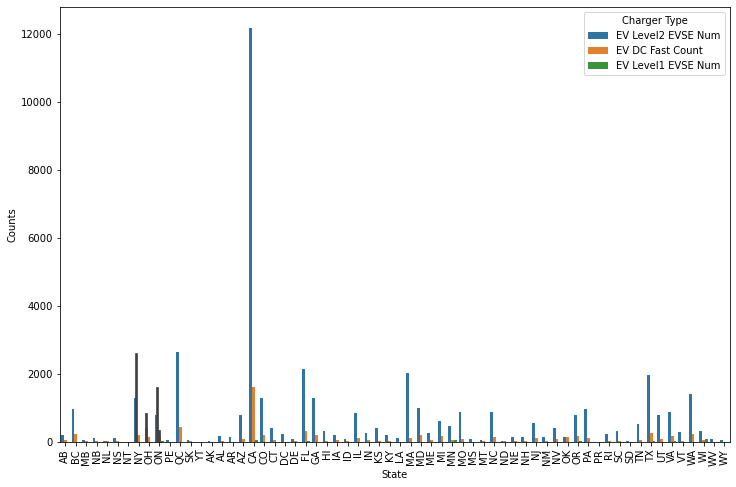

In [12]:
plt.subplots(figsize=(12, 8))

sns.barplot(x = 'State',
            y = 'Counts',
            hue = 'Charger Type',
            data = charger_count)

plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('State');

As we can see in the above figure:
1) California, US has the most EV Level 2 Chargers and the DC Fast Chargers

2) Quebec, Canada has the second most EV Level 2 Chargers and DC Fast Chargers, however, there is a big gap between QC and CA. CA is about 5 times more chargers than QC.

3) It seems that the more Level 2 Chargers are installed, the more DC Fast Chargers were installed in the same state/province.

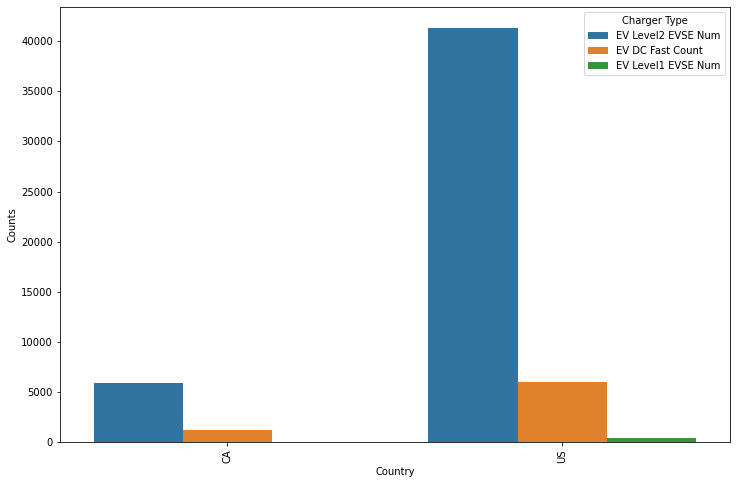

In [24]:
charger_country_count=charger_type.groupby(['Country'])['Charger Type'].value_counts()
charger_country_count=charger_country_count.to_frame(name='Counts').reset_index()
plt.subplots(figsize=(12, 8))

sns.barplot(x = 'Country',
            y = 'Counts',
            hue = 'Charger Type',
            data = charger_country_count)

plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('Country');

As we can see in the above figure:
1) the US has much more charging stations then Canada for all three types of chargers

2) the Level 2 EVSE is the dominant charging types in both Canada and US. The EV level 2 charger is about 4 to 5 times of DC fast chargers

3) the EV level 1 is very minor in both Canada and US

#### Open Date

In [14]:
#We also wanted to transform the Open Date data as a datetime data, however, 
#we found some errors in the datetime data.
charger_data['Open Date']=charger_data['Open Date'].fillna('2020-01-01')
charger_data.replace('0207-05-15','2017-05-15',inplace=True)

In [15]:
#Convert Open Date from Object to a datetime
charger_data['Open Date']=pd.to_datetime(charger_data['Open Date'])

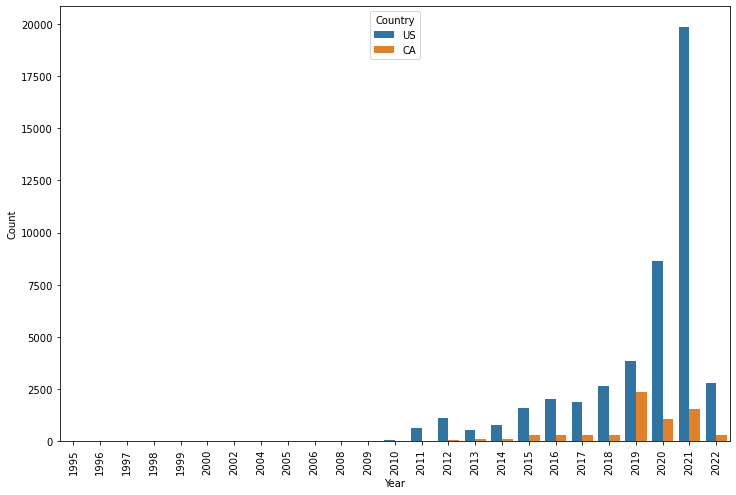

In [30]:
#Visualize the number of new stations were opened from 1995 to 2022
charger_data['Open Year']=charger_data['Open Date'].dt.year

plt.subplots(figsize=(12, 8))

ax = sns.countplot(x='Open Year', hue='Country', data=charger_data)

plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Year');
plt.show()

From the above figure, we can see that
1) the most number of chargers were installed in 2021 in the US. But the most number of chargers were installed in 2019 for Canada. *Why this difference happens?

2) it was also more than two times of new chargers installed in 2021 than in 2020 in the US.

3) it was also more than two times of new chargers installed in 2019 than in 2020 in the Canada.

#### Charger Types

In [16]:
#Inspect the type of EV connectors
charger_data['EV Connector Types'].value_counts()

J1772                               40424
CHADEMO J1772COMBO                   3788
TESLA                                3773
J1772 TESLA                          2857
CHADEMO J1772 J1772COMBO             1024
J1772COMBO                            483
CHADEMO J1772                         322
NEMA520                               189
CHADEMO                               110
J1772 J1772COMBO                       82
J1772 NEMA515                          73
J1772 NEMA520                          63
NEMA1450                               39
NEMA515                                26
J1772 NEMA1450                         13
CHADEMO J1772 J1772COMBO TESLA          5
CHADEMO J1772COMBO TESLA                2
CHADEMO J1772 NEMA520 TESLA             1
CHADEMO J1772 NEMA515                   1
J1772 NEMA515 NEMA520                   1
NEMA1450 NEMA520                        1
CHADEMO J1772 NEMA520                   1
NEMA1450 NEMA515                        1
CHADEMO J1772 J1772COMBO NEMA520  

As we can see above, there are mutiple types of chargers, and some of them are really messy. Based on my research we may classify the types of EV Connector Types to the following:
1. J1772
2. Tesla
3. J1772COMBO also called CCS COMBO
4. NEMA (including NEMA520, NEMA515, NEMA1450)
5. CHADEMO

https://blinkcharging.com/understanding-ev-charging-plugs/?locale=en

As a result, we may want to change some of the connector types into standard format, or we can split the connector types into four different columns. Use 1 or 0 to stand for whether they have the connector or not.

In [17]:
#5 new columns are created to define each type of the charging connector
charger_data['TESLA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("TESLA"), 1,0)
charger_data['NEMA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("NEMA"), 1,0)
charger_data['CCS'] = pd.np.where(charger_data['EV Connector Types'].str.contains("COMBO"), 1,0)
charger_data['CHADEMO'] = pd.np.where(charger_data['EV Connector Types'].str.contains("CHADEMO"), 1,0)
charger_data['J1772'] = pd.np.where(charger_data['EV Connector Types'].str.contains("J1772"), 1,0)-charger_data['CCS']+pd.np.where(charger_data['EV Connector Types'].str.contains("J1772 J1772COMBO"), 1,0)

/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_79360/2827256825.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  charger_data['TESLA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("TESLA"), 1,0)
/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_79360/2827256825.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  charger_data['NEMA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("NEMA"), 1,0)
/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_79360/2827256825.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  charger_data['CCS'] = pd.np.where(charger_data['EV Connector Types'].str.contains("COMBO"), 1,0)
/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykern

In [18]:
charger_data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,...,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Total Ports,TESLA,NEMA,CCS,CHADEMO,J1772
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,213-741-1151,E,Public,...,NaN,PARKING_GARAGE,NaN,NaN,12.0,0,0,0,0,1
1,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,626-575-6800,E,Public,...,NaN,STATE_GOV,Free,NaN,3.0,0,0,0,0,1
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,E,Public,...,NaN,HOSPITAL,Pay to Park,NaN,1.0,0,0,0,0,1
3,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,800-256-6219,E,Public - Call ahead,...,CALL,CAR_DEALER,Free,NaN,2.0,0,0,0,0,1
4,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,951-351-3110,E,Public,...,NaN,SHOPPING_MALL,Free,NaN,4.0,0,0,0,0,1


Visualize the charging stations by states and country

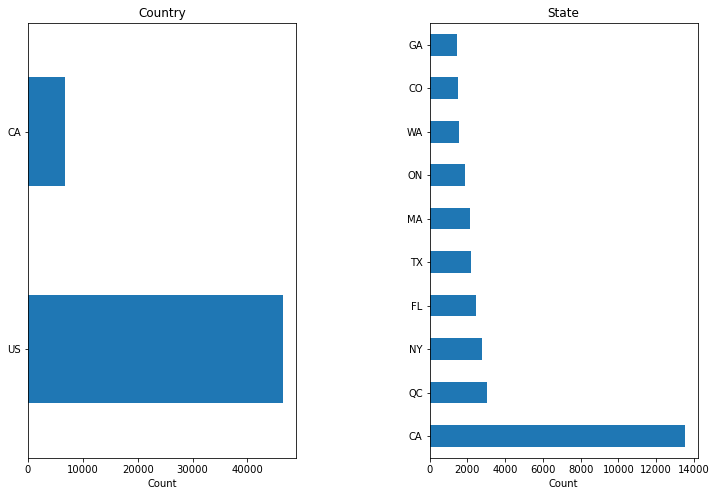

In [19]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data['Country'].value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Country')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data['State'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('State')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

Visualize the charging ports by states and country

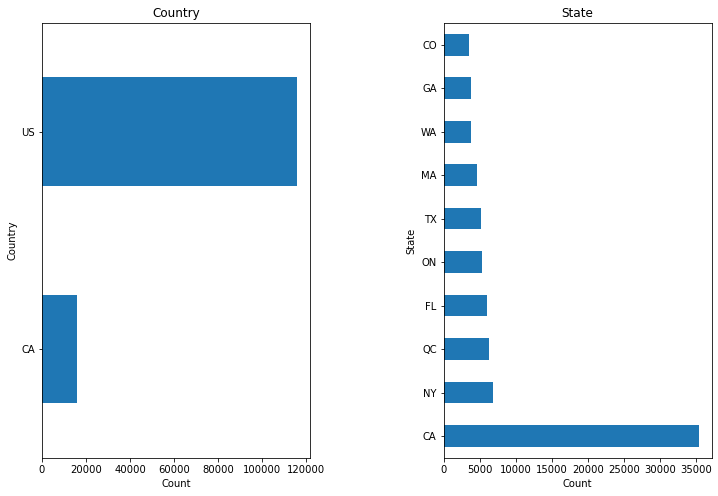

In [20]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data.groupby('Country')['Total Ports'].sum().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Country')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data.groupby('State')['Total Ports'].sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('State')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

As we can see from the above two figures:
1) US has many more charging stations and charging ports, compare to Canada.

2) California has the most charging station and charging ports. The gap between the 2nd most province/state is really large. 

3) Quebec has the 2nd most number of charging stations, but New York has the 2nd most charging ports. This indicated that each New York's charging stations may have more charging ports.

### 2.1 Canadian and United States EV Registration and Other Data:

Source:
Statistics Canada, United States Census Bureau

Multiple datasets have been merged into one excel file prior to loading into this Worksheet.

In [31]:
EVReg = pd.read_excel('../raw_data/US&CA STATES DATE.xlsx')
EVReg.head()

,Code,Province,Pop2016,GDP (2020),2020 EV Registration,2019 Total Registrated Cars,Country,Total Area km2,Land km2,Water km2
0,AB,Alberta,4067175,307522000000,0,3151829,CA,661848.0,642317.0,19531.0
1,BC,British Columbia,4648055,246927400000,8133,3113125,CA,944735.0,925186.0,19549.0
2,MB,Manitoba,1278365,60545400000,141,808918,CA,647797.0,553556.0,94241.0
3,NB,New Brunswick,747101,30051500000,53,553244,CA,72908.0,71450.0,1458.0
4,NFL,Newfoundland,519716,30137800000,0,350761,CA,405212.0,373872.0,31340.0


In [34]:
EVReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code                         64 non-null     object 
 1   Province                     64 non-null     object 
 2   Pop2016                      64 non-null     int64  
 3   GDP (2020)                   64 non-null     int64  
 4   2020 EV Registration         64 non-null     int64  
 5   2019 Total Registrated Cars  64 non-null     int64  
 6   Country                      64 non-null     object 
 7   Total Area km2               64 non-null     float64
 8   Land km2                     64 non-null     float64
 9   Water km2                    64 non-null     float64
dtypes: float64(3), int64(4), object(3)
memory usage: 5.1+ KB


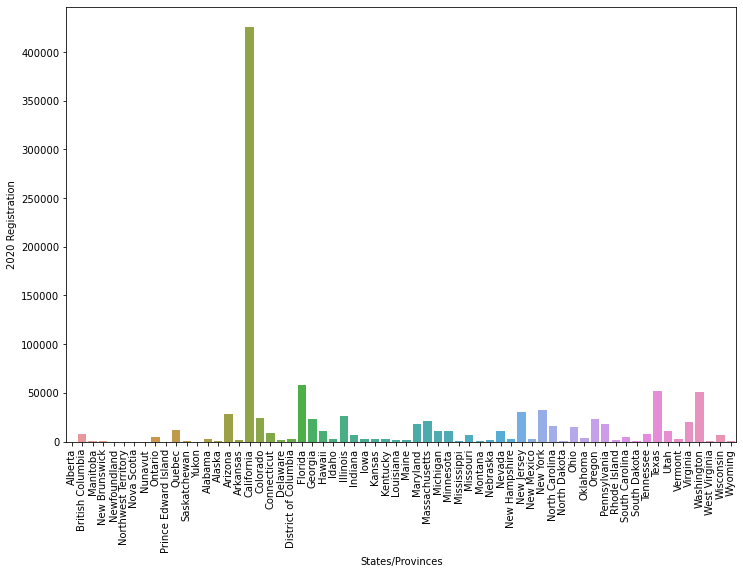

In [38]:
plt.subplots(figsize=(12, 8))

sns.barplot(x = 'Province',
            y = '2020 EV Registration',
            data = EVReg)

plt.xticks(rotation='vertical')
plt.ylabel('2020 Registration')
plt.xlabel('States/Provinces');

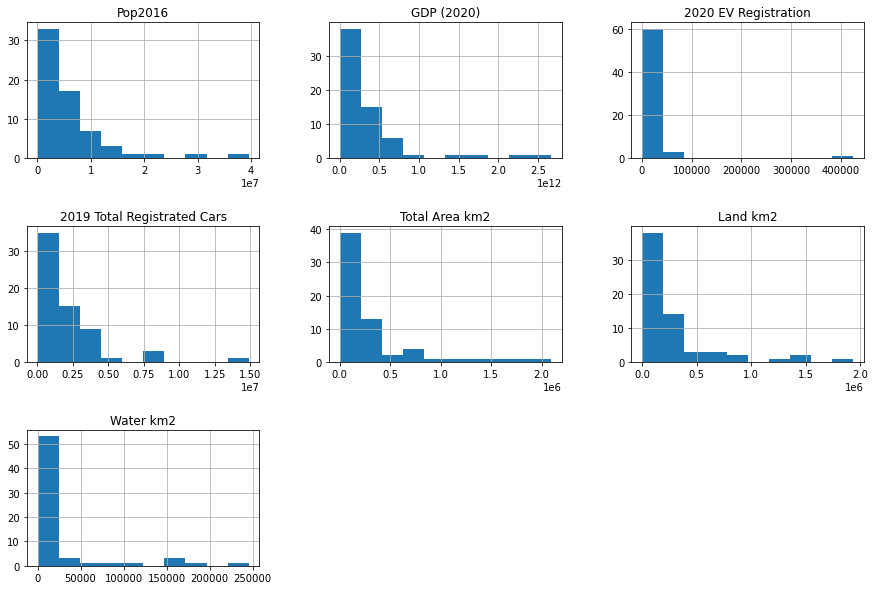

In [39]:
EVReg.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);